# **Bank Customer Churn Prediction**

1. **Objective**:

>The goal of this project is to predict whether a bank customer will leave the bank based on their demographics and financial information. This project aims to develop your skills in classification tasks, data preprocessing, and predictive modeling.

2. **Project Overview**:

> In this project, you will analyze a dataset containing various details about bank customers. Your main tasks are to:
 - Predict Customer Churn: Build a predictive model to estimate the likelihood of a customer leaving the bank.
 - Feature Impact Analysis: Identify and analyze the variables that most significantly impact customer churn.
 - Recommendation : Provide suggestions and recommendations based on your analysis and findings for the firm.

## 1. Data Preprocessing

### Download necessary package and importation of usual libraries

In [ ]:
# !pip install dash plotly streamlit shap
# !npm install localtunnel

In [2]:
#import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
import shap

### Load the Data: Import the dataset from the provided CSV file.

In [3]:
#connect to my drive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
#load the dataset
file_path = 'churn.csv'
df = pd.read_csv(file_path)

### Visualization of the dataset

In [5]:
# The size of the data set
df.shape

(10000, 14)

In [6]:
# Display the first few rows
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# Frequency of classes in the "Exited" column
exit_counts = df["Exited"].value_counts()
exit_counts

,count
Exited,
0,7963
1,2037


In [8]:
# Customers leaving the bank
churn = df.loc[df["Exited"]==1]

# Customers who did not leave the bank
not_churn = df.loc[df["Exited"]==0]

In [9]:
# examining the HasCrCard of the churn group
churn["HasCrCard"].value_counts()

,count
HasCrCard,
1,1424
0,613


In [10]:
# examining the HasCrCard of the not_churn group
not_churn["HasCrCard"].value_counts()

,count
HasCrCard,
1,5631
0,2332


In [11]:
# examining the IsActiveMember of the churn group
churn["IsActiveMember"].value_counts()

,count
IsActiveMember,
0,1302
1,735


In [12]:
# examining the IsActiveMember of the not_churn group
not_churn["IsActiveMember"].value_counts()

,count
IsActiveMember,
1,4416
0,3547


In [13]:
# Frequency of churn group according to Geography
churn.Geography.value_counts().sort_values()

,count
Geography,
Spain,413
France,810
Germany,814


In [14]:
# Frequency of not_churn group according to Geography
not_churn.Geography.value_counts().sort_values()

,count
Geography,
Germany,1695
Spain,2064
France,4204


In [15]:
# Frequency of churn group according to Gender
churn.Gender.value_counts()

,count
Gender,
Female,1139
Male,898


In [16]:
# Frequency of not_churn group according to Gender
not_churn.Gender.value_counts()

,count
Gender,
Male,4559
Female,3404


### Clean the Data: Handle missing values, if any, and correct data types.

In [17]:
# Check missing values
df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [19]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [20]:
#to remove unnecessary columns
df_cleaned = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [21]:
df_cleaned.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## 2. Exploratory Data Analysis (EDA)

### Feature Engineering: Create or modify features that may help improve model performance

In [23]:
# Encoding categorical variables
le = LabelEncoder()
df_cleaned['Geography'] = le.fit_transform(df_cleaned['Geography'])
df_cleaned['Gender'] = le.fit_transform(df_cleaned['Gender'])
# df_cleaned['Surname'] = le.fit_transform(df_cleaned['Surname'])

In [24]:
df_cleaned.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0


### Separating the data into features and targets variable

In [25]:
# Separate the data into features and targets variable
X = df_cleaned.drop('Exited', axis=1)
y = df_cleaned['Exited']

### Train-Test Split: Split the dataset into training and testing sets to evaluate model performance.

In [30]:
# Slitting the dataset into training and testing sets
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, random_state=42, test_size=0.2)

### Scaling numerical feature:(CreditScore, Age, Balance, EstimatedSalary) to ensure that they are on a similar scale.

In [31]:
df_cleaned.describe()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.746300,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.827529,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,1.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [32]:
# Columns to scale
columns_to_scale = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [33]:
# Scaling feature
scaler = StandardScaler()
Xtrain = scaler.fit_transform(Xtrain)
Xtest = scaler.transform(Xtest)

### Numerical Analysis

In [34]:
# Perform descriptive statistics on numerical variables
numerical_description = df_cleaned[columns_to_scale].describe()
numerical_description


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


### Structural Analysis

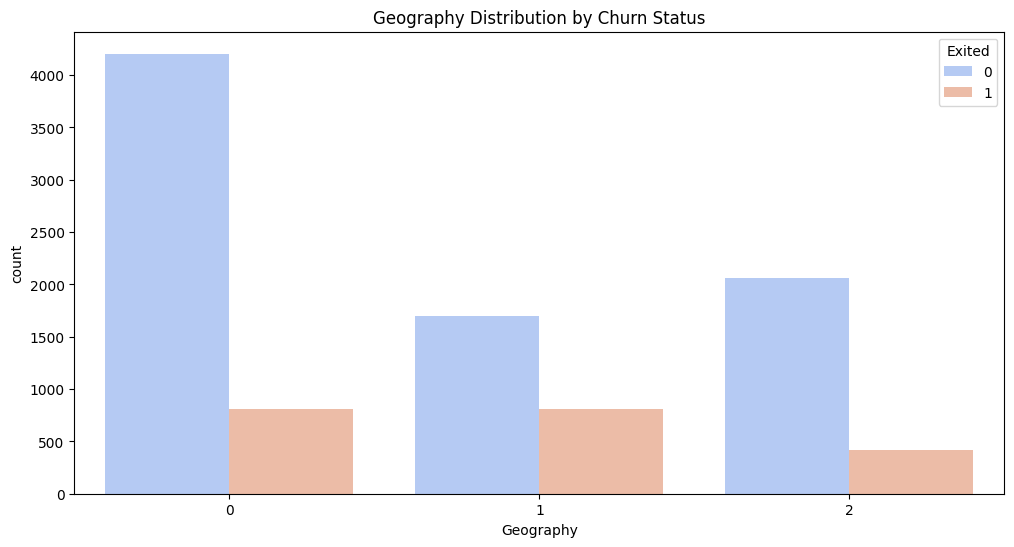

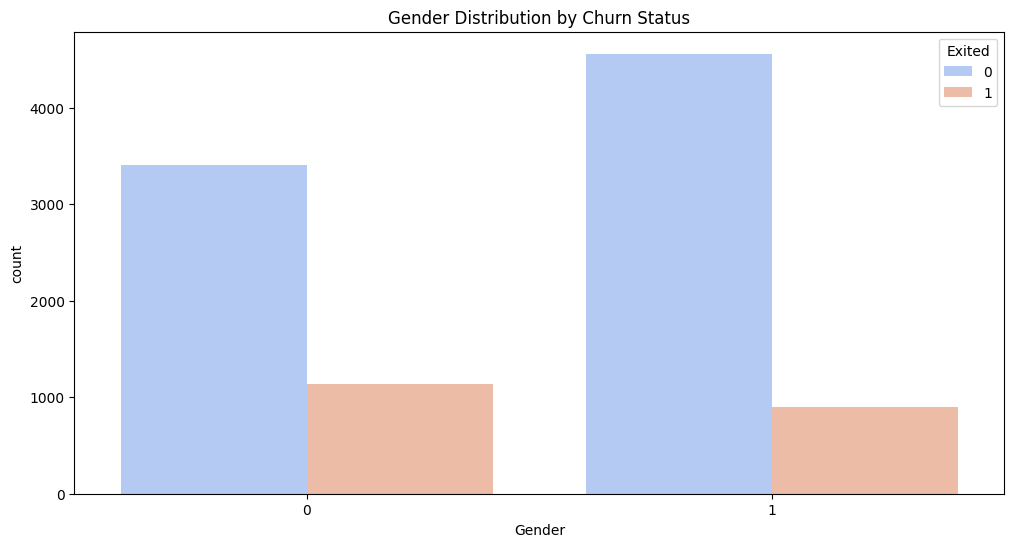

In [35]:
# Analyze the distribution of categorical variables and their impact on customer churn
plt.figure(figsize=(12, 6))
sns.countplot(x='Geography', hue='Exited', data=df_cleaned, palette='coolwarm')
plt.title('Geography Distribution by Churn Status')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='Gender', hue='Exited', data=df_cleaned, palette='coolwarm')
plt.title('Gender Distribution by Churn Status')
plt.show()

# plt.figure(figsize=(12, 6))
# sns.countplot(x='Surname', hue='Exited', data=df_cleaned, palette='coolwarm')
# plt.title('Surname Distribution by Churn Status')
# plt.show()

### Correlation Analysis

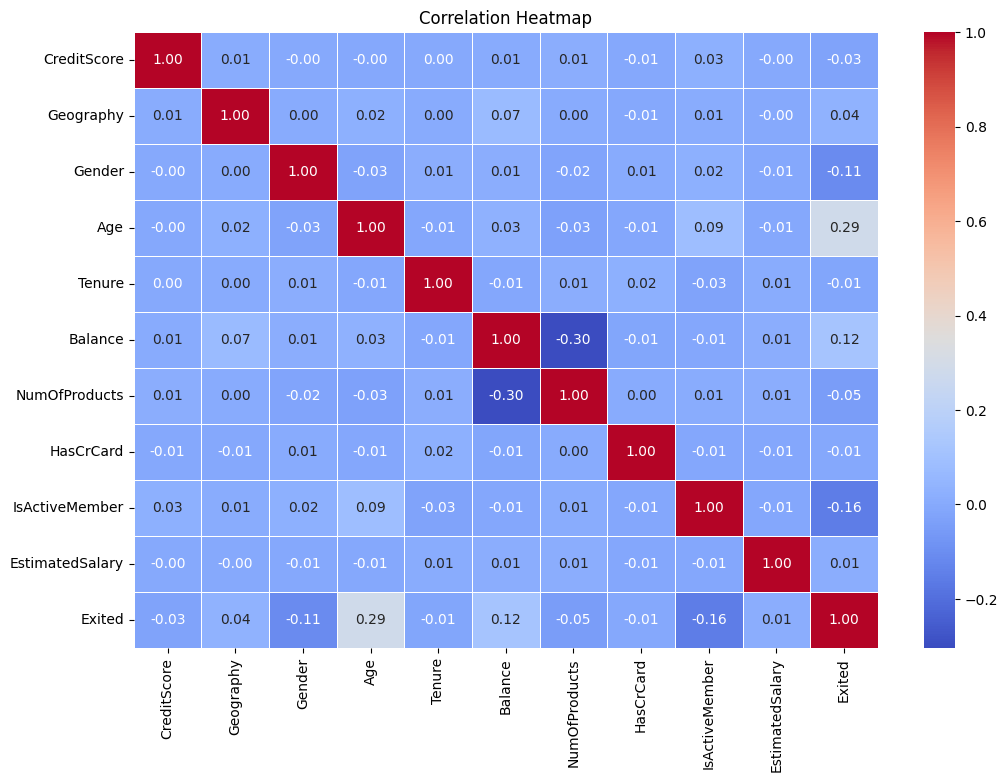

In [36]:
# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df_cleaned.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

### Feature Impact Analysis

<ipython-input-37-838daaee92b5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Age', data=df_cleaned, palette='coolwarm')


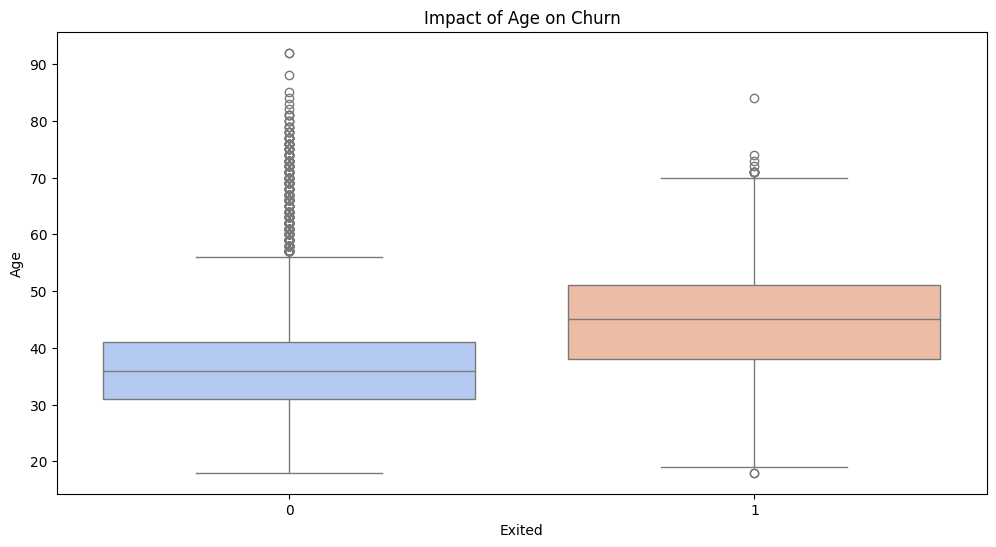

<ipython-input-37-838daaee92b5>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='Balance', data=df_cleaned, palette='coolwarm')


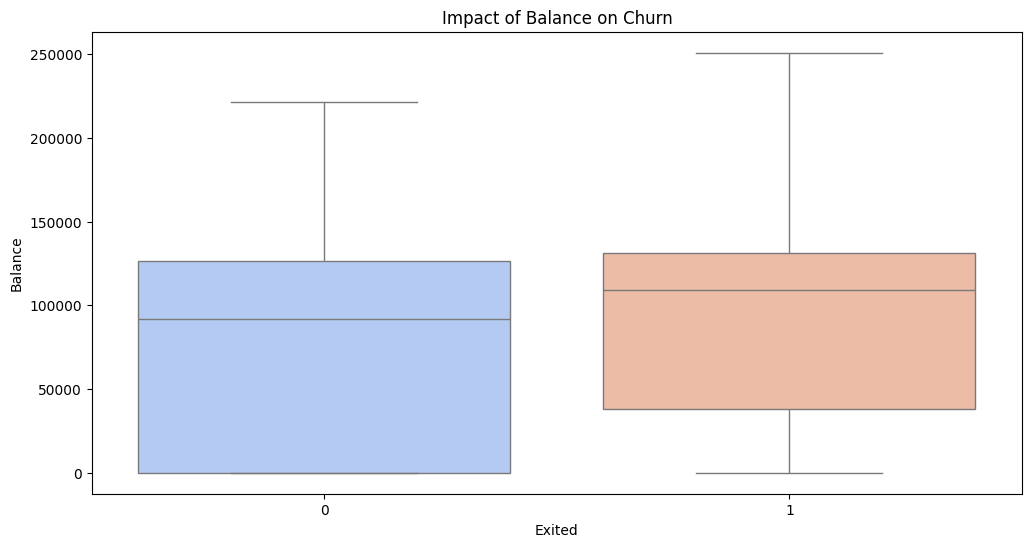

<ipython-input-37-838daaee92b5>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Exited', y='CreditScore', data=df_cleaned, palette='coolwarm')


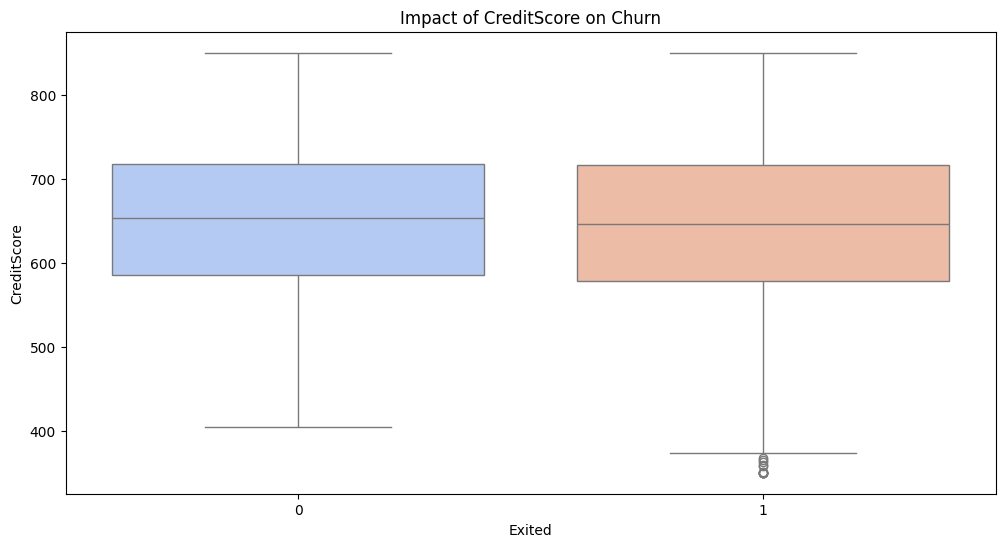

In [37]:
# Analyze feature impacts using visualizations
plt.figure(figsize=(12, 6))
sns.boxplot(x='Exited', y='Age', data=df_cleaned, palette='coolwarm')
plt.title('Impact of Age on Churn')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Exited', y='Balance', data=df_cleaned, palette='coolwarm')
plt.title('Impact of Balance on Churn')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Exited', y='CreditScore', data=df_cleaned, palette='coolwarm')
plt.title('Impact of CreditScore on Churn')
plt.show()

## 3. Model Training and Testing

### Train Models: Use the list of models including Logistic Regression, Random Forest Classifier, Gaussian Naive Baye, KNN, MLPClassifier, Decision Tree

In [38]:
# List of models for the training
list_models = {
    "LogisticRegression": LogisticRegression(),
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "DecisionTreeClassifier": DecisionTreeClassifier(),
    "GaussianNB": GaussianNB(),
    "MLPClassifier": MLPClassifier(),
}

# Save the model performance
model_performance = {}

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


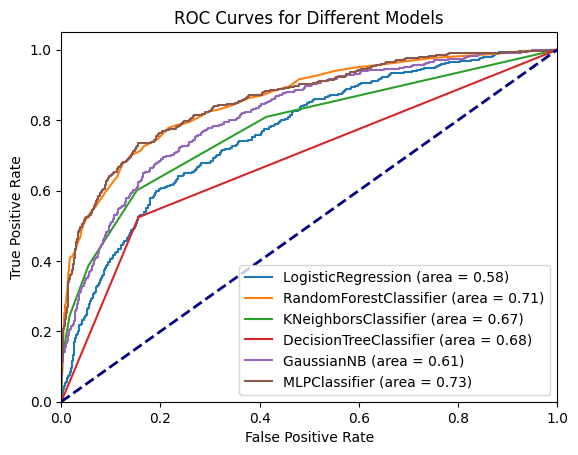

In [39]:
# Training and testing of each model
for model_name, model in list_models.items():
  m = model.fit(Xtrain, ytrain)
  y_pred = m.predict(Xtest)
  accuracy = accuracy_score(ytest, y_pred)
  precision = precision_score(ytest, y_pred)
  recall = recall_score(ytest, y_pred)
  f1 = f1_score(ytest, y_pred)
  roc_auc = roc_auc_score(ytest, y_pred)

  model_performance[model_name] = {
    'model': m,
    'y_pred': y_pred,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'ROC-AUC': roc_auc
  }
  # Get probability estimates for the positive class
  y_pred_proba = m.predict_proba(Xtest)[:, 1]

  # Calculate ROC curve
  fpr, tpr, _ = roc_curve(ytest, y_pred_proba)

  # Plot ROC curve
  plt.plot(fpr, tpr, label=f'{model_name} (area = {roc_auc:.2f})')

# Plot ROC curve for all models
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()

In [40]:
model_performance_df = pd.DataFrame(model_performance).T
model_performance_df

,model,y_pred,Accuracy,Precision,Recall,F1-Score,ROC-AUC
LogisticRegression,LogisticRegression(),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.815,0.596639,0.180662,0.277344,0.575396
RandomForestClassifier,"(DecisionTreeClassifier(max_features='sqrt', r...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, ...",0.8645,0.747967,0.468193,0.5759,0.714806
KNeighborsClassifier,KNeighborsClassifier(),"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, ...",0.8355,0.633333,0.386768,0.480253,0.666004
DecisionTreeClassifier,DecisionTreeClassifier(),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, ...",0.7815,0.451754,0.524173,0.485277,0.684302
GaussianNB,GaussianNB(),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, ...",0.8285,0.681159,0.239186,0.354049,0.605903
MLPClassifier,MLPClassifier(),"[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, ...",0.868,0.738007,0.508906,0.60241,0.732362


### Evaluate Models: Use metrics such as accuracy, precision, recall, F1-score, and area under the ROC curve (AUC) to evaluate model performance.

In [41]:
# Display the accuracy of each model
model_performance_df[:]['Accuracy']

,Accuracy
LogisticRegression,0.815
RandomForestClassifier,0.8645
KNeighborsClassifier,0.8355
DecisionTreeClassifier,0.7815
GaussianNB,0.8285
MLPClassifier,0.868


In [42]:
model_performance_df[:]['Precision']

,Precision
LogisticRegression,0.596639
RandomForestClassifier,0.747967
KNeighborsClassifier,0.633333
DecisionTreeClassifier,0.451754
GaussianNB,0.681159
MLPClassifier,0.738007


In [43]:
model_performance_df['model'].iloc[1]

RandomForestClassifier(random_state=42)

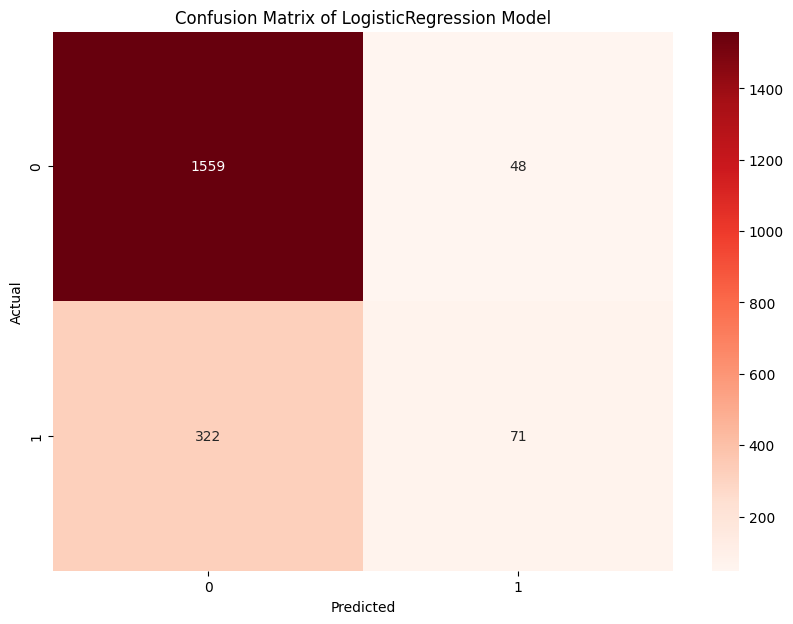

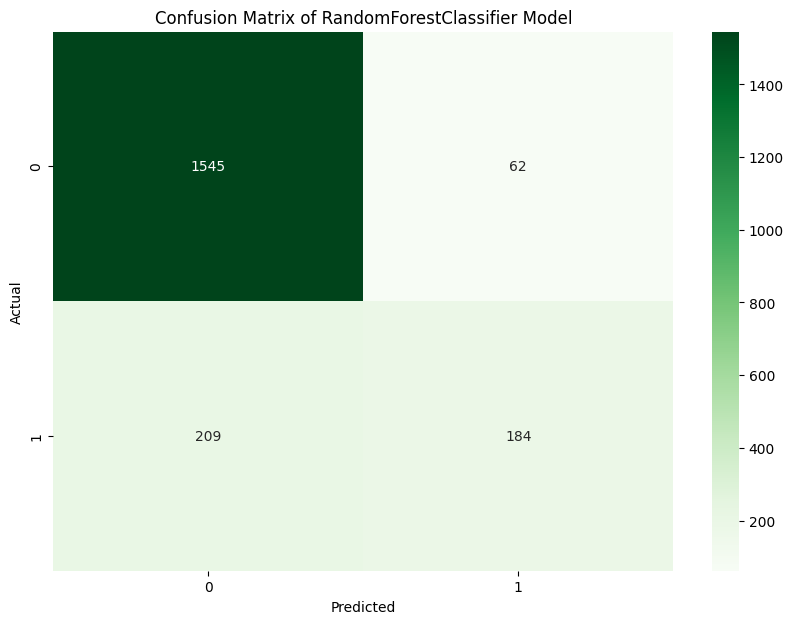

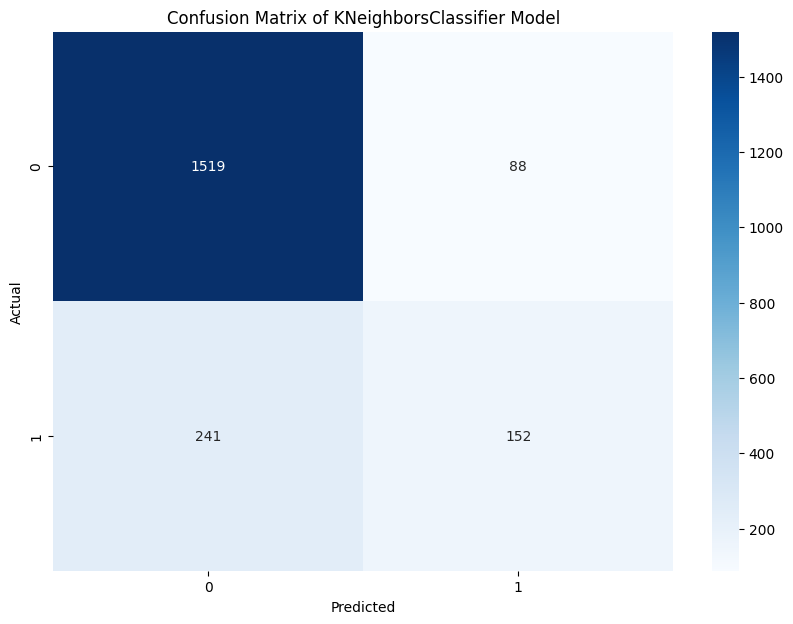

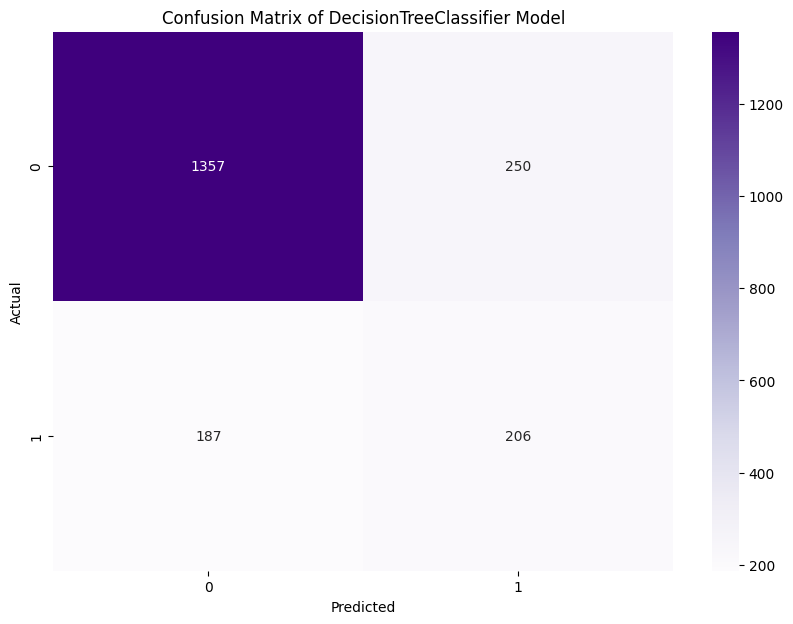

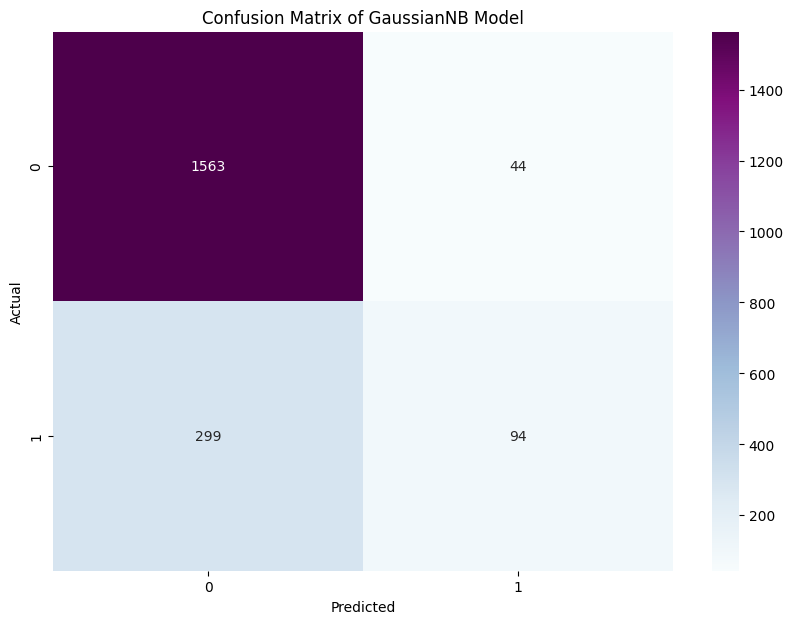

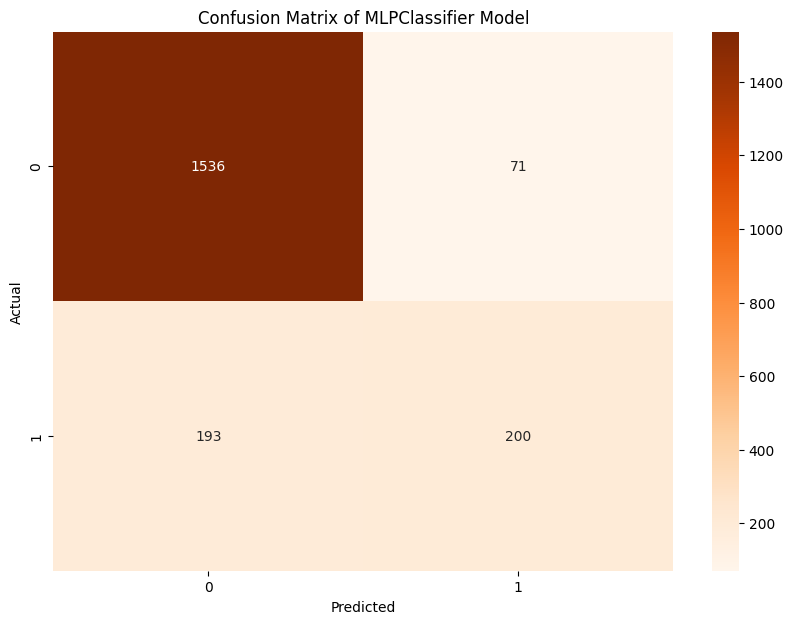

In [44]:
# Confusion matrix
modelNames = list(list_models.keys())
map_color = ['Reds','Greens','Blues', 'Purples', 'BuPu', 'Oranges']
i = 0
for y_pred in model_performance_df[:]['y_pred'].tolist():
  cm = confusion_matrix(ytest,y_pred)
  # Plot confusion matrix
  plt.figure(figsize=(10, 7))
  sns.heatmap(cm, annot=True, fmt='d', cmap=map_color[i])
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title(f'Confusion Matrix of {modelNames[i]} Model')
  plt.show()
  i+=1

### Model Comparison: Compare the performance of different models to choose the best one for the task.

In [45]:
# Compare the performance of different models
print("Model Performance Comparison:")
model_performance_df['Accuracy']

Model Performance Comparison:


,Accuracy
LogisticRegression,0.815
RandomForestClassifier,0.8645
KNeighborsClassifier,0.8355
DecisionTreeClassifier,0.7815
GaussianNB,0.8285
MLPClassifier,0.868


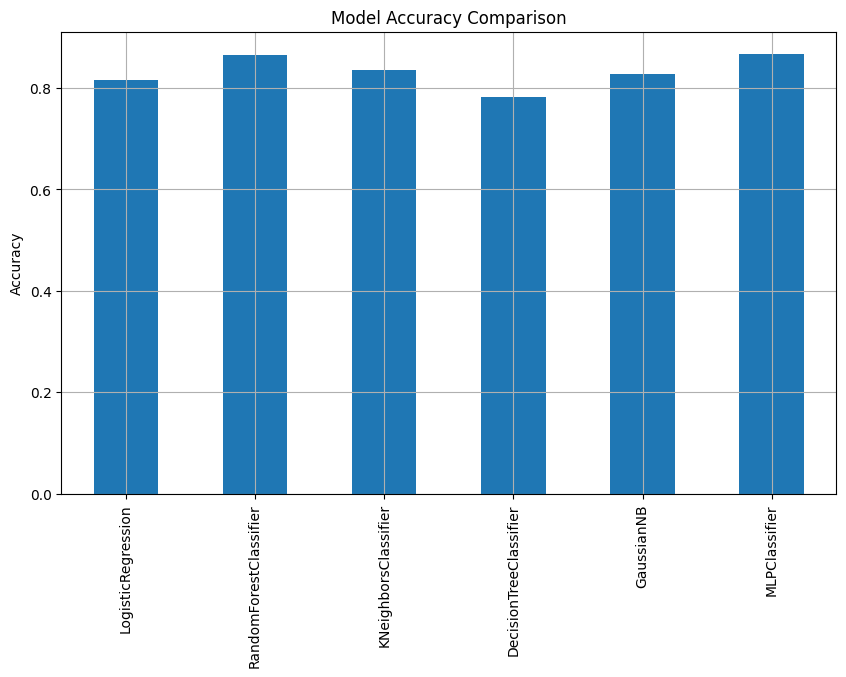

In [46]:
# Visualize the comparison
model_performance_df['Accuracy'].plot(kind='bar', figsize=(10, 6), title="Model Accuracy Comparison")
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

## 4. Feature Importance Analysis

### Feature Importance: Extract and visualize feature importance.

<ipython-input-47-244d7609b64e>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(f'Feature Importance using {model_performance_df.model[1]}')


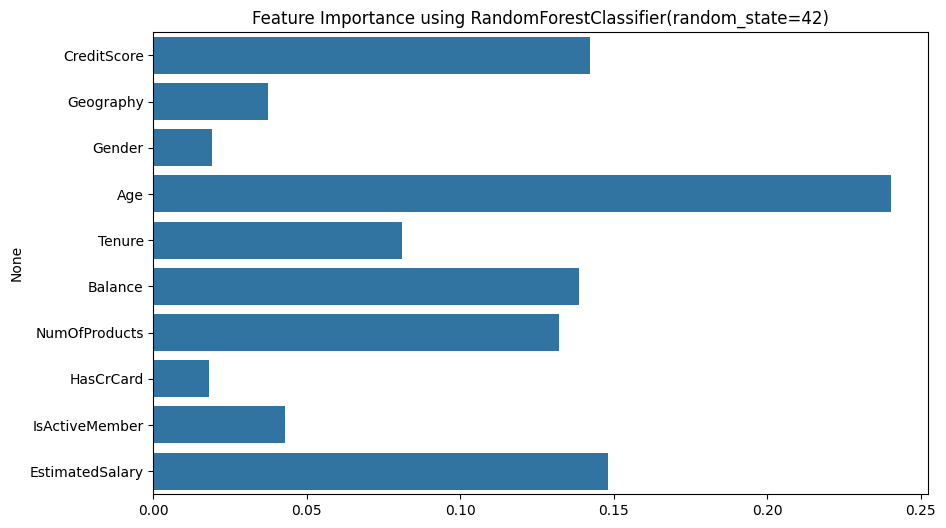

In [47]:
# Feature Importance Visualization
importances = model_performance_df['model'].iloc[1].feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title(f'Feature Importance using {model_performance_df.model[1]}')
plt.show()

### SHAP Analysis: Use SHAP (SHapley Additive exPlanations) values to explain the output of RandomForestClassifier models.

In [48]:
# Initialize SHAP explainer
explainer = shap.TreeExplainer(model_performance_df['model'].iloc[1])

In [49]:
shap_values = explainer.shap_values(Xtest)

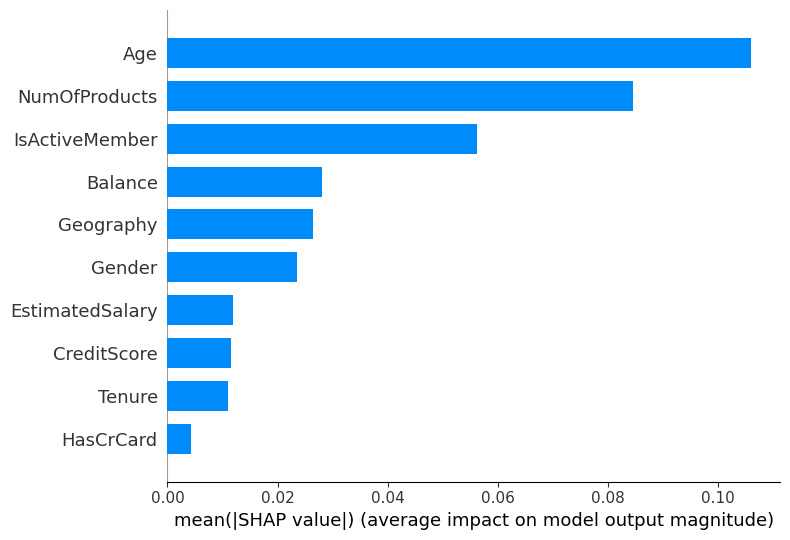

In [50]:
# Summary plot of SHAP values
shap.summary_plot(shap_values[:,:,1], Xtest, plot_type="bar", feature_names=X.columns)

(2000, 10)
(2000, 10)
3


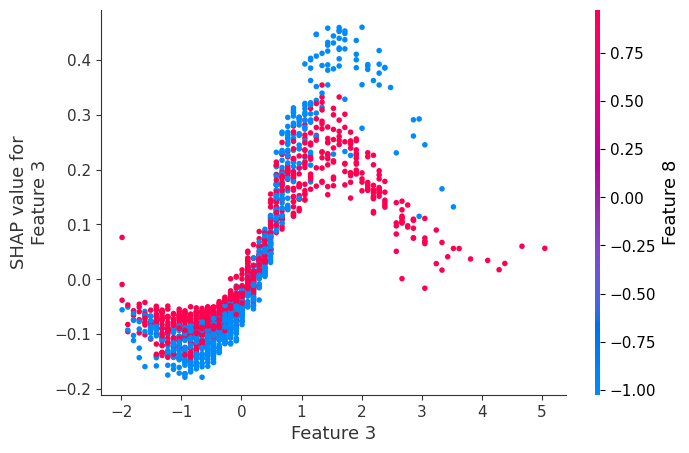

In [51]:
# SHAP dependence plot for a specific feature
print(shap_values[:,:,1].shape)
print(Xtest.shape)
age_index = X.columns.get_loc('Age')
print(age_index)
shap.dependence_plot(age_index, shap_values[:,:,1], Xtest)

## 5. Interactive Dashboard with Streamlit

In [57]:
%%writefile app.py
import streamlit as st

# Streamlit Dashboard
st.title("Bank Customer Churn Prediction Dashboard")

# Data Summary
st.header("Data Summary")
st.write(df_cleaned.describe())

# Visualizations
st.header("Visualizations from EDA")
fig, ax = plt.subplots()
sns.countplot(x='Exited', data=df_cleaned, palette='coolwarm', ax=ax)
st.pyplot(fig)

fig, ax = plt.subplots()
sns.heatmap(df_cleaned.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, ax=ax)
st.pyplot(fig)

# Model Performance Metrics
for model_name, model_info in model_performance.items():
  accuracy = model_info['Accuracy']
  precision = model_info['Precision']
  recall = model_info['Recall']
  f1 = model_info['F1-Score']
  roc_auc = model_info['ROC-AUC']
  st.header(f"Model Performance Metrics {model_name}")
  st.write(f"Accuracy: {accuracy}")
  st.write(f"Precision: {precision}")
  st.write(f"Recall: {recall}")
  st.write(f"F1-Score: {f1}")
  st.write(f"ROC-AUC: {roc_auc}")

# Predictions on New Data

# Convert Xtest to a DataFrame if it's not already
if not isinstance(Xtest, pd.DataFrame):
    Xtest = pd.DataFrame(Xtest)


st.header("Predictions on New Data")
new_data = Xtest.iloc[:10]  # Example: Take the first 10 rows from the test set
st.write("New Data Samples:")
st.write(new_data)

predictions = model.predict(new_data)
st.write("Predictions:")
st.write(predictions)

Overwriting app.py


In [53]:
!wget -q -O - https://loca.lt/mytunnelpassword

34.16.205.164

In [54]:
!wget -q -O - ipv4.icanhazip.com

34.16.205.164


In [55]:
#run the dashboad
!streamlit run app.py & npx localtunnel --port 8501



your url is: https://open-pets-drum.loca.lt

  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.16.205.164:8501

  Stopping...
^C


In [56]:
# st.header("Predictions on New Data")
model = model_performance_df['model'].iloc[1]
new_data = Xtest.iloc[:10]  # Example: Take the first 10 rows from the test set
print(new_data)

predictions = model.predict(new_data)
predictions

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [ ]:
ytest[:10]